**Roman Schiffino**

CS 251: Data Analysis and Visualization

# Lab 2 | Logical indexing and categorical data analysis
## Task 1: Getting set up and load in the Iris dataset

### 1a. Setup
In the cell below:
1. Import numpy
2. Import matplotlib

In [235]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use(["seaborn-v0_8-colorblind", "seaborn-v0_8-darkgrid"])
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1b. Load in the Iris dataset

1. Read the Iris dataset from `data/iris.csv` using [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html) into a numpy ndarray with 5 columns.
    - The columns correspond to the usual Iris variables:<br/>0:`sepal_length`, 1:`sepal_width`, 2:`petal_length`, 3:`petal_width`, and 4:`species`.
    - This version of the Iris dataset has the `species` categorical variable (last column) levels coded as ints<br/>0 for `"setosa"`, 1 for `"versicolor"`, and 2 for `"virginica"`.
    - The list of the iris variables and the `cat2levels` dictionary that maps between int-coded and string-coded levels are provided below.
3. Print out the 1st 5 rows and the shape. The 1st 5 rows should match the 1st 5 rows of `data/iris.csv` (*open up the file and verify!*). The shape should be `(150, 5)`.

In [236]:
# KEEP ME
iris_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
cat2levels = {"species": ["setosa", "versicolor", "virginica"]}
data = np.genfromtxt("data/iris.csv", delimiter=",")
print(data[:5])
print(data.shape)


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]
(150, 5)


## Task 2: Logical indexing

In this task, you will practice NumPy"s powerful **logical indexing** technique to select data based on a specific categorical data value.

### 2a. Use logical indexing to count the number of 0 values in an 1D ndarray


In one line of code, use logical indexing to count and print the number of 0s in `test_data`, which contains 1D fake data with `N=100` samples. You should get a count of `20` 0s.

This involves creating a **1D boolean (logical) array** by comparing your data array with a single (scalar) value using the `==` operator. For example: <br/>`my_data_array == single_value`<br/>The result of this operation is the logical array that has the same length as the original data array (100 in the case of `test_data` below): an entry is `True` (1) if the i-th value matches your desired value (e.g. `0`) or `False` (0) if the i-th value does not. The count can be computed by summing up the logical array.<br/><br/>**Note:** You should not use any loops!

In [237]:
# KEEP ME
test_data = np.array([1, 0, 1, 4, 1, 4, 0, 2, 4, 4, 3, 2, 1, 0, 3, 4, 1, 4, 2, 4, 2, 4,
       0, 0, 3, 1, 2, 2, 4, 2, 0, 2, 0, 4, 0, 3, 2, 3, 4, 4, 4, 4, 1, 3,
       2, 3, 1, 3, 1, 1, 1, 0, 1, 4, 4, 0, 0, 2, 1, 4, 1, 3, 3, 1, 3, 2,
       1, 0, 4, 1, 1, 1, 0, 0, 3, 0, 2, 2, 4, 0, 2, 2, 4, 4, 2, 3, 2, 1,
       0, 2, 2, 1, 1, 1, 4, 0, 0, 1, 0, 4])

print(np.sum(test_data == 0))


20


### 2b. Use logical indexing to count the number of samples that belong to the each of the 3 iris species

1. Create a ndarray filled with 3 zeros. This array will store the number of samples that belong to each of the 3 iris species (remember: they are int-coded as `0`, `1`, and `2`).
2. In only 1 line of code per species (**at most** 3 lines total), compute the counts for each species using logical indexing and assign the count to the appropriate index of your length 3 ndarray. In this case, the logical array has entries of `True` (1) if the `species` categorical variable value of a sample has the desired level (e.g. `0` if we are counting `setosa` iris species) or `False` (0) if the sample does not.
3. Print out your counts for the 3 iris species. You should get `[50. 50. 50.].`

In [238]:
print(np.array([np.sum(data[:,[4]]==0), np.sum(data[:,[4]]==1), np.sum(data[:,[4]]==2)]))


[50 50 50]


### 2c. Use logical indexing to select the petal lengths of only the versicolor iris species

1. Similar to what you did in Task 2b, create a 1D logical array that indicates whether samples belong to the `"versicolor"` iris species (int-coded as `1`).
2. Index into the original iris dataset 2D ndarray, plugging in the logical array as the ROWS (instead of typing :). For the COLUMN, select the column index (an int) that is appropriate for the variable we are interested in (`petal_length`).
3. Print out the result. There should be `50` float values. What is the meaning of these values?

In [239]:
print(np.array(data[data[:,4]==1, 3]))

[1.4 1.5 1.5 1.3 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.
 1.5 1.1 1.8 1.3 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6
 1.5 1.3 1.3 1.3 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3]


### 2d. Use logical indexing to filter the dataset

Index into the original data array and plug in the same logical array from Task 2c for the ROWS, but this time omit/do NOT specify any COLUMN. Print out and interpret what you get.

In [240]:
print(np.array(data[data[:,4]==1]))

[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 3.3 4.7 1.6 1. ]
 [4.9 2.4 3.3 1.  1. ]
 [6.6 2.9 4.6 1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 4.1 1.  1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [5.9 3.2 4.8 1.8 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.7 2.6 3.5 1.  1. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [6.  2.7 5.1 1.6 1. ]
 [5.4 3.  4.5 1.5 1. ]
 [6.  3.4 4.5 1.6 1. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.3 2.3 4.4 1.3 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [5.5 2.5 4.  1.3 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.8 2.6 4.  1.2 1. ]
 [5.  2.3 3

### 2e. Use logical indexing to compute the mean petal length for each of the 3 iris species

1. Create a ndarray named `means` filled with 3 zeros. This array will store the mean petal length of each of the 3 iris species.
2. Adapt what you did in Task 2c to fill in the mean petal length of each species using logical indexing. You should only write 1 line of code per species (**at most 3 lines of code for computing means, no loops!!**).

You should get: `[1.462 4.26  5.552]`

In [241]:
means = np.array([np.mean(data[data[:,4]==0,2]), np.mean(data[data[:,4]==1,2]), np.mean(data[data[:,4]==2,2])])
print(means)


[1.462 4.26  5.552]


### 2f. Create a horizontal bar chart plotting the mean of the petal length of the 3 iris species

Your goal is to make a bar chart with 3 bars, one for each species of iris, showing the mean petal length of each species. Your bars should extend **horizontally**, as is common for plotting categorical data. You should use [plt.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html). See an [example plot here](https://pandas.pydata.org/docs/_images/pandas-DataFrame-plot-barh-1.png). For the `y` parameter, you can plug in a list or array indicating the 3 y values next to which you want to draw each bar (e.g. [0, 1, 2])

Your plot should have:
- A title.
- x and y axis labels.
- Categorical levels (string-coded) should be labeled on the y axis. To do this, use [plt.yticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html), but plug in both the `ticks` and `labels` keyword arguments. For `ticks`, you can plug in the same `y` values you used in your `plt.barh` call.

Text(0, 0.5, 'Species')

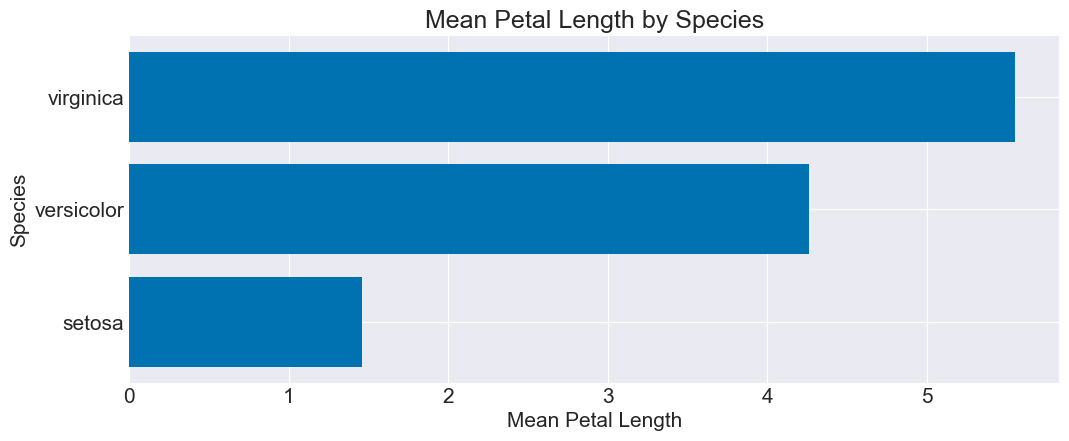

In [242]:
plt.barh(cat2levels["species"], width=np.array([np.mean(data[data[:,4]==0,2]), np.mean(data[data[:,4]==1,2]), np.mean(data[data[:,4]==2,2])]))
plt.title("Mean Petal Length by Species")
plt.xlabel("Mean Petal Length")
plt.ylabel("Species")

### 2g. Adapt your horizontal bar chart code for `sidebarplot` in `charts.py`

Open `charts.py` in a text editor and copy-paste the code that you wrote from the previous task into `sidebarplot`.

Adapt your code to make use of the function parameters instead of hard-coded values for Iris. This includes replacing `y=[0, 1, 2]` with a list of ints generated by `np.arange` without hard-coding the upper limit plugged in.

Running the following code should generate the same plot as you got in Task 2f above except:
- no x-axis and y-axis label, but this is ok and expected
- the mean value displayed next to each bar

**Note:** You will be using `charts.py` function in Project 2.

In [243]:
import charts

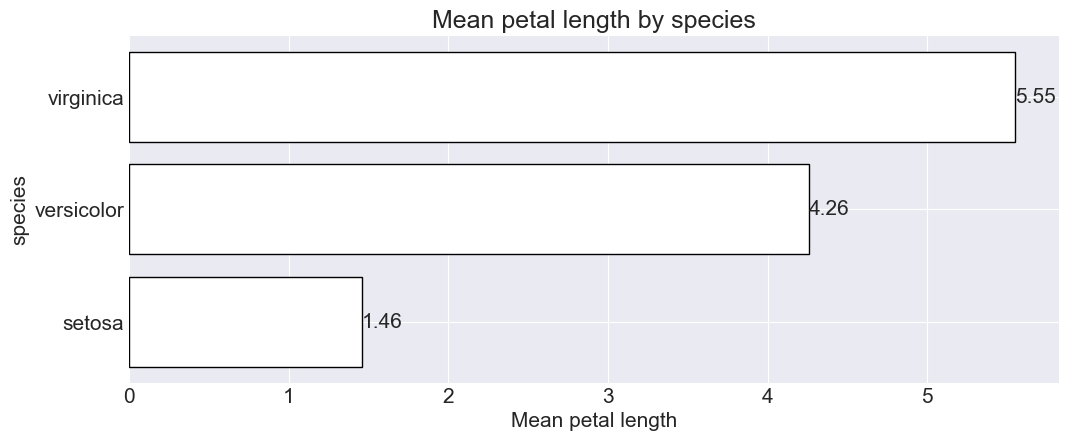

In [244]:
charts.sidebarplot(values=means, labels=cat2levels["species"], title="Mean petal length by species", figsize=(12, 4.5))

## Task 3: Sorting two corresponding arrays

Let"s say that we have two arrays whose corresponding values "go together". For example, in the `colors` and `years` arrays below, "Emerald" is associated with 2020 (i.e. "Emerald" was the color in 2020), "Dandelion" is associated with 2022 (i.e. "Dandelion" was the color in 2022), and so on.

A common situation that arises in Project 2 and data analysis more broadly is that we want to present one array in a certain order and we want to make sure values in the other array still match up after sorting. For example, maybe we would like to present the colors in chronological order ("Emerald" on 2020, "Crimson" on 2021, etc.) or maybe we want to present the colors in alphabetical order ("Amber", "Blue", etc.). The problem is that we cannot simply sort one array because that would leave the other array "out of sync."

Write code under the subtasks below that sorts the `colors` and `years` arrays in the desired order. There are multiple ways to solve this problem. One way involves [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html).

In [245]:
colors = np.array(["Emerald", "Dandelion", "Crimson", "Blue", "Amber"])
years = np.array([2020, 2022, 2021, 2024, 2023])

### 3a. Sort by colors

Sort both arrays so that the colors appear in alphabetical order.

You should get:
```
["Amber" "Blue" "Crimson" "Dandelion" "Emerald"]
[2023 2024 2021 2022 2020]
```

In [246]:
args = np.argsort(colors)
print(colors[args])
print(years[args])

['Amber' 'Blue' 'Crimson' 'Dandelion' 'Emerald']
[2023 2024 2021 2022 2020]


### 3b. Sort by year

Sort both arrays so that the years appear in chronological order.

You should get:
```
["Emerald" "Crimson" "Dandelion" "Amber" "Blue"]
[2020 2021 2022 2023 2024]
```

In [247]:
args = np.argsort(years)
print(colors[args])
print(years[args])

['Emerald' 'Crimson' 'Dandelion' 'Amber' 'Blue']
[2020 2021 2022 2023 2024]


### 3c. Adapt your sorting code for `sort` in `charts.py`

Copy-paste the code that you wrote above into the `sort` function in `charts.py`.

Adapt your code to make use of the function parameters instead of hard-coded values. Use the keyword argument `sort_by` to determine if you should:
- NOT sort the two arrays at all (`sort="na"`)
- sort the arrays based on the `values` array (the 1st array).
- sort the arrays based on the `label` array (the 2nd array).

Run the following test code to check your implementation.

In [248]:
# Test sorting by value
test_values_sort, test_labels_sort = charts.sort(values=colors, labels=years, sort_by="value")
print(f'After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n[2023 2024 2021 2022 2020]\nThe values are:\n{test_values_sort}\nand should be\n["Amber" "Blue" "Crimson" "Dandelion" "Emerald"]')

After sorting by value, the labels are:
[2023 2024 2021 2022 2020]
and should be
[2023 2024 2021 2022 2020]
The values are:
['Amber' 'Blue' 'Crimson' 'Dandelion' 'Emerald']
and should be
["Amber" "Blue" "Crimson" "Dandelion" "Emerald"]


In [249]:
# Test sorting by label
test_values_sort, test_labels_sort = charts.sort(values=colors, labels=years, sort_by="label")
print(f'After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n[2020 2021 2022 2023 2024]\nThe values are:\n{test_values_sort}\nand should be\n["Emerald" "Crimson" "Dandelion" "Amber" "Blue"]')

After sorting by value, the labels are:
[2020 2021 2022 2023 2024]
and should be
[2020 2021 2022 2023 2024]
The values are:
['Emerald' 'Crimson' 'Dandelion' 'Amber' 'Blue']
and should be
["Emerald" "Crimson" "Dandelion" "Amber" "Blue"]


In [250]:
# Test no sorting
test_values_sort, test_labels_sort = charts.sort(values=colors, labels=years, sort_by="na")
print(f'After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n[2020 2022 2021 2024 2023]\nThe values are:\n{test_values_sort}\nand should be\n["Emerald" "Dandelion" "Crimson" "Blue" "Amber"]')

After sorting by value, the labels are:
[2020 2022 2021 2024 2023]
and should be
[2020 2022 2021 2024 2023]
The values are:
['Emerald' 'Dandelion' 'Crimson' 'Blue' 'Amber']
and should be
["Emerald" "Dandelion" "Crimson" "Blue" "Amber"]


## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.